Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [ ]:
COLLABORATORS = "Reuben Solnick, Morgan McNulty, Olivia Lease"

---

# Final Project

This notebook will provide a brief structure and rubric for presenting your final project. 

The purpose of the project is 2-fold
* To give you an opportunity to work on a problem you are truly interested in (as this is the best way to actually learn something)
* To demonstrate to me that you understand the overall workflow of problem solving from problem selection to implementation to discussion 

You can choose any subject area that interests you as long as there is a computational component to it.  However, please do not reuse projects or homeworks you have done in other classes.  This should be **your** original work.

**You can work in teams, but clearly identify each persons contribution** and every team member should hand in their own copy of the notebook.

### Structure
There are 5 parts for a total of 100 points that provide the overall structure of a mini research project.

* Problem Description
* Problem Justification
* Description of Computational components needed to address problem
* Implementation including tests
* Discussion of results and future directions

For grading purposes, please try to make this notebook entirely self contained. 

The project is worth about 2 problem sets and should be of comparable length (please: I will have about 100 of these to read and I am not expecting full 10 page papers).  The actual project does not necessarily have to work but in that case you should demonstrate that you understand why it did not work and what steps you would take next to fix it.

Have fun

## Problem Description [15 pts]

In ~4-5 paragraphs, describe the general problem you want to solve and the goals you hope to achieve. You should provide any relevant background, equations you plan to solve and references, particularly if you are reproducing results from a paper.  Please use proper spelling and grammar. 

Our project explores evolutionary game theory and specifically looks at the replicator equation. Evolutionary game theory was first developed to understand the relative equality of sex ratio in mammals, but now is a pretty large field that combines game theory, evolution, and dynamical systems to help better understand biological interactions. In order to perform evolutionary game theory (EGT) analysis, we need to simulate game agents and their strategy frequencies with populations of players. We then need to compute the fitness of different strategies relative to their population.This is often done with payoff matrices. Payoff matrices are constructed by the reward and cost of choosing a specific strategy for the player, which often depends on the other player’s decision as well. In our project we construct two payoff matrices– one for the prisoner’s dilemma and another for the battle of the sexes. We explain how we made these matrices in our implementation.  Lastly, we must define how the specific evolution is looked at and its process should be governed. For this we use the replicator equation, an ODE that controls the frequencies’ growth. Strategies that outperform the average are rewarded through their frequency being increased, and penalizes those who underperform in comparison in the same way.  


The main solution concept in game theory is the Nash Equilibrium (NE) which is used to understand evolutionary stability. The Nash Equilibrium is where the strategies available have a mutual best response. This means that no player would be better off choosing a different strategy than their chosen strategy. However, the Nash Equilibrium does not always exist, especially in more complicated evolutionary games where the two players have different options. The Nash equilibrium can be thought of as a “local optimum” since any player’s deviation from that equilibrium leaves a player worse off than before. However, Nash equilibrium does not fully capture the idea of evolutionary stability. In evolution, we use the evolutionary stable strategy (ESS), and it is almost the same as the Nash but stronger. The evolutionary stable strategy requires that no matter the starting value the population will converge to it. This is not always true of the Nash Equilibrium. 

The replicator equation looks at replicator dynamics- which is the natural selection process that determines how specific strategies evolve in populations over time. The replicator dynamics are different for each evolutionary model. We only look at two-player symmetric and asymmetric games with continuous time versions of the equations. In a symmetric two-player game the payoff matrices and actions are identical for both players involved, so this game can be modeled quite simply– by one single population playing against one another. The players in symmetric games do not necessarily choose the same strategies, they just have the same strategies available to them and have the same payoff corresponding to each strategy. Asymmetric games require that each player comes from a different population with different actions. 

For this project, we are specifically utilizing the payoff matrices and equations used in a An Introduction To Evolutionary Game Theory(https://www.cs.ubc.ca/~kevinlb/teaching/cs532a%20-%202004-5/Class%20projects/Tim.pdf)  We are looking to replicate the initial symmetrical example they used– the prisoner’s dilemma– and the initial asymmetrical example – the battle of the sexes. 

Roles: 
Intro, asymmetrical analytical solution: Olivia Lease

Symmetrical analytical solution, asymmetrical computations: Morgan McNulty 

Symmetrical computations: Reuben Solnick 

Collaborated together on the justification, methods, and discussion 


## Problem Justification [5 pts] 

Briefly describe why this problem is important to you,  and, if possible, to anyone else.

Understanding game theory and specifically its uses in evolution is helpful because it helps us see what strategies help certain species prevail over others in evolution and why. It is specifically important to us because we are interested in applying this to viruses and how more contagious virions are often less lethal for their own good in our senior Applied Math seminar. Understand evolutionary stability and game theory is especially important in climate change; we can use it to help understand how animals can and will adapt in this era of mass extinction.

Although the replicator equations appear somewhat simple, they are often very difficult, or impossible, to solve analytically. For example, even in the simplest case of Prisoner’s Dilemma it is impossible to isolate x in the ODE solution. Therefore understanding how to solve these equations numerically is important. 

## Computational  Methods [10 pts]

Describe the specific approach you will take to solve some concrete aspect of the general problem. 

You should  include all the numerical or computational methods you intend to use.  These can include methods or packages  we did not discuss in class but provide some reference to the method. You do not need to explain in detail how the methods work, but you should describe their basic functionality and justify your choices. 

**If you need to install or import any additional python packages,  please provide complete installation instructions in the code block below**



In prisoner’s dilemma we plan to solve the ODE replicator equation using various different methods used in class (specifically RK4, RK2, Euler, and improved Euler) and compare their outcomes. Since exact anlytical solutions are very difficult to solve and implement, we used high order methods in solve_ivp to compare our in-class methods against. For standard payoff matricies, such as the one in our example paper (P < L < R < W), we expect the proportion of cooperators to converge to 0, since defecting is the dominant strategy. 


In the Battle of the Sexes problem we plan to solve the replicator equation ODE, solve for the Nash equilibrium, and show the limit cycle of the solution to the replicator equations. We plan to solve the replicator equation using Euler’s method, improved Euler’s method, and the RK4 method. We know what to expect for the limit cycle based on the papers we are referencing, so will evaluate our solutions by comparing the limit cycles to those standards. We will solve for the Nash equilibrium by taking advantage of the fact that the NE is a fixed point of the system of replicator equations. So we will use the scipy root scalar function with the brentq method because we have a bracket that we know will have one root within it. We will evaluate this by comparing it to the Nash equilibrium we will solve for analytically.


In [ ]:
#Import required packages

%matplotlib inline
%precision 3
import numpy
import matplotlib.pyplot as plt
from sympy import symbols, Eq
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar
from ipywidgets import *

## Implementation [60 pts]

Use the Markdown and Code blocks below to implement and document your methods including figures.  Only the first markdown block will be a grading cell but please add (not copy) cells in this section to organize your work. 

Please make the description of your problem readable by interlacing clear explanatory text with code (again with proper grammar and spelling). 
All code should be well described and commented.

For at least one routine you code below, you should provide a test block (e.g. that implements `numpy.testing` routines) to validate your code.  

An **important** component of any computational paper is to demonstrate to yourself and others that your code is producing correct results.

### Two Player Symmetric Continuous Replicator Equations

**Prisoner's dilemma analytical solution:**

The replicator equation for a symmetric continuous game is the following:

$\dot x = x_i (f_i(t) - \bar f(t))$

This means that the rate of change of the frequency of players playing strategy i is equal to the current frequency times how much better that stratgy's fitness is than the average fitness. 

Payoff matrix is $\begin{bmatrix}
R & P \\
W & L 
\end{bmatrix}$ where R is the reward when both players cooperate, P is the penalty if this player cooperates but the other defects, W is the reward this player defects and the other player cooperates, and L is the penalty if both players defect. Assume that $P < L < R < W$.

$\overrightarrow{x} = \begin{bmatrix}
x \\
1-x
\end{bmatrix}$ where row 1 gives the frequency of cooperators and row 2 gives the frequency of defectors.

Average fitness $= \overrightarrow{x}_T A \overrightarrow{x} = \bar{f}(t)$

$\begin{bmatrix}
x & 1-x
\end{bmatrix} 
$
$
\begin{bmatrix}
R & P \\
W & L 
\end{bmatrix}
$
$
\begin{bmatrix}
x \\
1-x
\end{bmatrix}
$ = 
$\begin{bmatrix}
Rx+W-Wx & Px+L-Lx
\end{bmatrix} 
$
$\begin{bmatrix}
x\\
1-x
\end{bmatrix} 
$

$=Rx^2+Wx-Wx^2+Px+L-Lx-Px^2-Lx+Lx^2$

$\bar{f}(t) = x^2(R-W-P+L) + x(W+P-2L) +L$

Solving for the replicator equation for cooperators:

Cooperator fitness $=(A\overrightarrow{x})_1$

$
A\overrightarrow{x} = 
\begin{bmatrix}
R & P \\
W & L 
\end{bmatrix}
$
$\begin{bmatrix}
x \\
1-x
\end{bmatrix} 
$ =
$\begin{bmatrix}
(R-P)x + P \\
(W-L)x + L
\end{bmatrix} 
$

$\dot{x_c} = x_c (A\overrightarrow{x})_1 - \bar{f}) \\
= x^3(W-R+P-L) + x^2(R-2P-W+2L) + x(P-L)$




In [ ]:
def prisDelemaTimeDerivative(R, P, W, L, x):
  """
  Creates a differential equation describing replicator dynamics of symmetric two player system.
  This function can either be used to study the time derivative of a symmetric two player system,
  or paired with ODE solvers to study populations.

  Parameters
  R (float): Reward when both players cooperate
  P (float): Punishment for cooperating player when one player defects and one cooperates
  W (float): Reward for defecting player when one player defects and one cooperates
  L (float): Punishment when both players defect
  x (float): proportion of cooperating players. Can be either a float or numpy array of floats 

  Returns:
  Array of differential equations describing replicator dynamics of symmetric two player system

  """
  
  #set up output array, and reward matrix
  outPut =[]
  A = numpy.array([[R, P], [W, L]])
  
  #account for vector inputs of x
  if not hasattr(x, '__iter__'):
    x = [x]

  #compute the time derivative for each x vector
  for i in x:
    xVector = numpy.array([i, 1-i])

    avgPopFitness = numpy.dot(numpy.dot(xVector.transpose(), A), xVector)
    popFitness = numpy.dot(A, xVector)[0]

    outPut.append(i*(popFitness - avgPopFitness))
  
  return numpy.array(outPut)


In [ ]:
#Set parameters for examples below
R = -1
P = -20
W = 0
L = -10

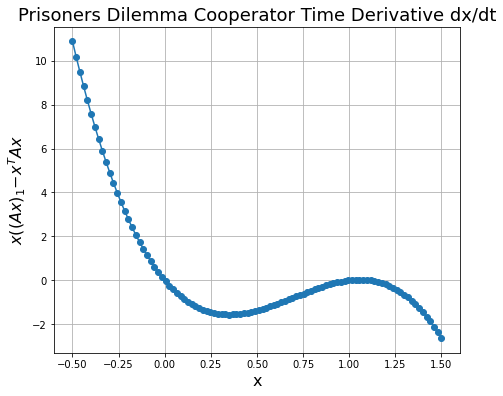

In [ ]:
#Graph the Time Derivative
dtFunc = lambda x: prisDelemaTimeDerivative(R, P, W, L, x)
x = numpy.linspace(-.5, 1.5, 100)


fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1, 2, 1)
axes.grid()
axes.plot(x, dtFunc(x), 'o-')
axes.set_xlabel('x', fontsize=16)
axes.set_ylabel('$x((Ax)_1 − x^T Ax$', fontsize=16)
axes.set_title('Prisoners Dilemma Cooperator Time Derivative dx/dt', fontsize=18)
fig.show()


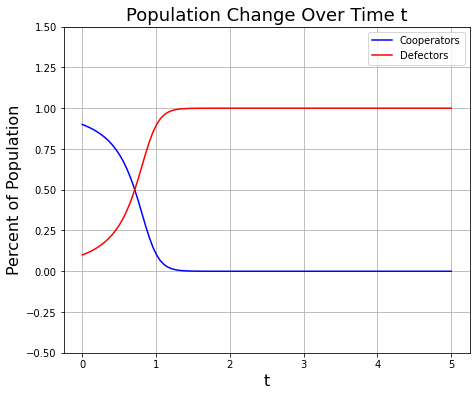

In [ ]:
#Graph population change using scipy solve_ivp ODE solver
popFunc = lambda t,x: prisDelemaTimeDerivative(R, P, W, L, x)
sol = solve_ivp(popFunc, [0,5], [0.9, 0.1], rtol=1.e-6, atol=1.e-9, dense_output=True, vectorized=True, method = 'DOP853')
t = numpy.linspace(0,5,100)

fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1, 2, 1)
axes.grid()
axes.plot(t, sol.sol(t)[0], 'b', label = 'Cooperators')
axes.plot(t, 1-sol.sol(t)[0], 'r', label = "Defectors")
axes.legend(loc="best")
axes.set_ylim(-0.5, 1.5)
axes.set_xlabel("t", fontsize = 16)
axes.set_ylabel("Percent of Population", fontsize = 16)
axes.set_title('Population Change Over Time t', fontsize=18)
fig.show()

Note how the slope of the percent of population matches with the values in the graph of the time derivative.

In [ ]:
%matplotlib notebook
#Study Population Change using different ODE solvers from class
#Function for solving RK2
def RK2(f, t_span, u0, N):
    """ implement constant step size 2 stage Runge-Kutta Method RK2"""
    
    t = numpy.linspace(t_span[0], t_span[1], N)
    delta_t = t[1] - t[0]
    u = numpy.empty(t.shape)
    u[0] = u0 
    for (n, t_n) in enumerate(t[:-1]):
        K_1 = delta_t * f(t_n, u[n])
        K_2 = delta_t * f(t_n + delta_t/2., u[n] + K_1/2.)
        u[n+1] = u[n] + K_2
    return t, u

#Function for solving improved euler
def improved_euler(f, t_span, u0, N):
    """ implement constant step size 2 stage Improved Euler Method trapezoidal rule"""
    
    t = numpy.linspace(t_span[0], t_span[1], N)
    delta_t = t[1] - t[0]
    u = numpy.empty(t.shape)
    u[0] = u0
    for (n, t_n) in enumerate(t[:-1]):
        K_1 = delta_t * f(t_n, u[n])
        K_2 = delta_t * f(t_n + delta_t, u[n] + K_1)
        u[n+1] = u[n] + 0.5 * (K_1 + K_2)
    return t, u 

#Function for solving RK4
def RK4(f, t_span, u0, N):
    """ implement constant step size 4 stage Runge-Kutta Method RK4"""
    
    t = numpy.linspace(t_span[0], t_span[1], N)
    delta_t = t[1] - t[0]
    u = numpy.empty(t.shape)
    u[0] = u0
    for (n, t_n) in enumerate(t[:-1]):
        K_1 = delta_t * f(t_n, u[n])
        K_2 = delta_t * f(t_n + delta_t/2., u[n] + K_1/2.)
        K_3 = delta_t * f(t_n + delta_t/2., u[n] + K_2/2.)
        K_4 = delta_t * f(t_n + delta_t, u[n] + K_3)
        u[n+1] = u[n] + 1./6. * (K_1 + 2.*( K_2 + K_3) + K_4)
    return t, u

#Create differential equation using function
popFunc = lambda t,x: prisDelemaTimeDerivative(R, P, W, L, x)

#Use ODE solvers
solRK2 = RK2(popFunc, [0,5], 0.9, 50)
solImEu = improved_euler(popFunc, [0,5], 0.9, 50)
solRK4 = RK4(popFunc, [0,5], 0.9, 50)


#Plot all of the results from the ODE solvers
fig = plt.figure(figsize=(13.5,6))

axes = fig.add_subplot(1, 3, 1)
axes.grid()
line1, = axes.plot(solRK2[0], solRK2[1], 'b', label = 'Cooperators')
line2, = axes.plot(solRK2[0], 1-solRK2[1], 'r', label = "Defectors")
axes.legend(loc="best")
axes.set_ylim(-0.5, 1.5)
axes.set_xlim(-0.5, 5)
axes.set_xlabel("t", fontsize = 16)
axes.set_ylabel("Percent of Population", fontsize = 16)
axes.set_title('RK2', fontsize=18)


axes = fig.add_subplot(1, 3, 2)
axes.grid()
line3, = axes.plot(solImEu[0], solImEu[1], 'b', label = 'Cooperators')
line4, = axes.plot(solImEu[0], 1-solImEu[1], 'r', label = "Defectors")
axes.legend(loc="best")
axes.set_ylim(-0.5, 1.5)
axes.set_xlim(-0.5, 5)
axes.set_xlabel("t", fontsize = 16)
axes.set_ylabel("Percent of Population", fontsize = 16)
axes.set_title('Improved Euler', fontsize=18)


axes = fig.add_subplot(1, 3, 3)
axes.grid()
line5, = axes.plot(solRK4[0], solRK4[1], 'b', label = 'Cooperators')
line6, = axes.plot(solRK4[0], 1-solRK4[1], 'r', label = "Defectors")
axes.legend(loc="best")
axes.set_ylim(-0.5, 1.5)
axes.set_xlim(-0.5, 5)
axes.set_xlabel("t", fontsize = 16)
axes.set_ylabel("Percent of Population", fontsize = 16)
axes.set_title('RK4', fontsize=18)

#Create sliders to see how different values of N change the graphs
def update(N = 100):
    solRK2 = RK2(popFunc, [0,5], 0.9, N)
    solImEu = improved_euler(popFunc, [0,5], 0.9, N)
    solRK4 = RK4(popFunc, [0,5], 0.9, N)
    
    line1.set_xdata(solRK2[0])
    line1.set_ydata(solRK2[1])
    line2.set_xdata(solRK2[0])
    line2.set_ydata(1-solRK2[1])
    
    line3.set_xdata(solImEu[0])
    line3.set_ydata(solImEu[1])
    line4.set_xdata(solImEu[0])
    line4.set_ydata(1-solImEu[1])
    
    line5.set_xdata(solRK4[0])
    line5.set_ydata(solRK4[1])
    line6.set_xdata(solRK4[0])
    line6.set_ydata(1-solRK4[1])
    
    fig.canvas.draw_idle()

interact(update, N = (5,500))


fig.tight_layout()
fig.show()

<IPython.core.display.Javascript object>

interactive(children=(IntSlider(value=100, description='N', max=500, min=5), Output()), _dom_classes=('widget-…

<IPython.core.display.Javascript object>

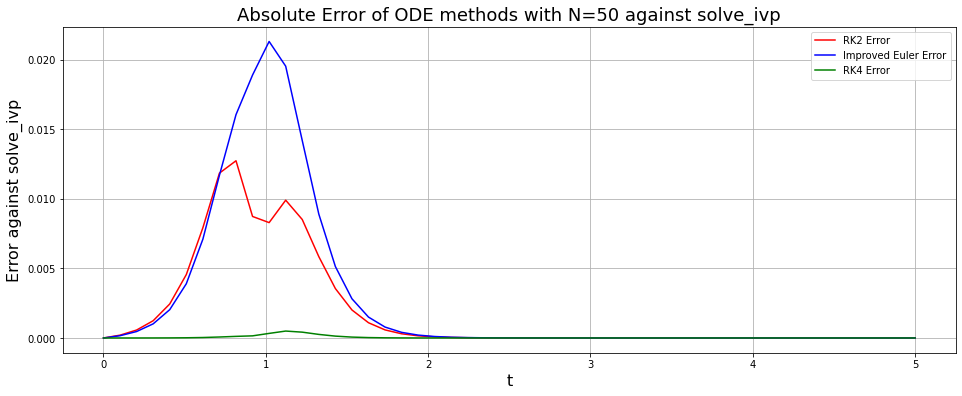

In [ ]:
%matplotlib inline
#Comparing the the ODE solvers against the solve_ivp 
popFunc = lambda t,x: prisDelemaTimeDerivative(-1, -20, 0, -10, x)
sol = solve_ivp(popFunc, [0,5], [0.9, 0.1], rtol=1.e-6, atol=1.e-9, dense_output=True, vectorized=True, method = 'DOP853')
solRK2 = RK2(popFunc, [0,5], 0.9, 50)
solImEu = improved_euler(popFunc, [0,5], 0.9, 50)
solRK4 = RK4(popFunc, [0,5], 0.9, 50)

#Calculate absolute error
RK2_err = numpy.abs((solRK2[1] - sol.sol(solRK2[0])[0]))
ImEu_err = numpy.abs((solImEu[1] - sol.sol(solImEu[0])[0]))
RK4_err = numpy.abs((solRK4[1] - sol.sol(solRK4[0])[0]))

#Graph
fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1, 1, 1)
axes.grid()
axes.plot(solRK2[0], RK2_err, 'r', label = 'RK2 Error')
axes.plot(solImEu[0], ImEu_err, 'b', label = "Improved Euler Error")
axes.plot(solRK4[0], RK4_err, 'g', label = "RK4 Error")
axes.legend(loc="best")
axes.set_xlabel("t", fontsize = 16)
axes.set_ylabel("Error against solve_ivp", fontsize = 16)
axes.set_title('Absolute Error of ODE methods with N=50 against solve_ivp', fontsize=18)
fig.show()

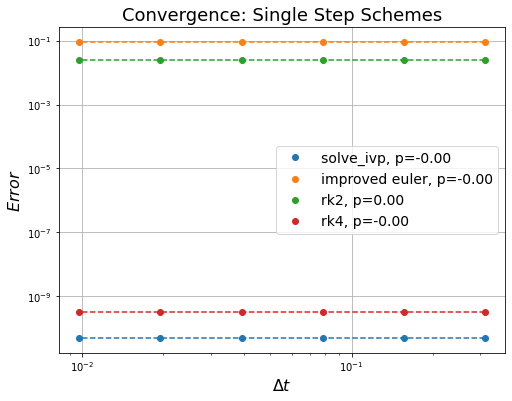

In [ ]:
#Convergence of different ODE methods to the analytically derivited true solution of 0
N = numpy.array([ 2**n for n in range(4,10)])
err_ivp = numpy.zeros(len(N))
err_ieuler = numpy.zeros(len(N))
err_RK2 = numpy.zeros(len(N))
err_RK4 = numpy.zeros(len(N))

t_span = [0, 5]
dt = t_span[1]/N

u0 = 0.9 
u_exact = 0

for i, n in enumerate(N):
    u_ivp = solve_ivp(popFunc, [0,5], [0.9, 0.1], rtol=1.e-6, atol=1.e-9, dense_output=True, vectorized=True, method='DOP853').sol(t)[0]
    err_ivp[i] = numpy.abs(u_ivp[-1] - u_exact)
    t, u_ieuler = improved_euler(popFunc, [0,5], 0.9, 25)
    err_ieuler[i] = numpy.abs(u_ieuler[-1] - u_exact)
    t, u_RK2 = RK2(popFunc, [0,5], 0.9, 25)
    err_RK2[i] = numpy.abs(u_RK2[-1] - u_exact)
    t, u_RK4 = RK4(popFunc, [0,5], 0.9, 25)
    err_RK4[i] = numpy.abs(u_RK4[-1] - u_exact)
    


err_fit = lambda dt, p: numpy.exp(p[1])*dt**p[0]
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)

# Euler
p = numpy.polyfit(numpy.log(dt[2:]), numpy.log(err_ivp[2:]),1)
line = axes.loglog(dt, err_ivp, 'o', label='solve_ivp, p={:3.2f}'.format(p[0]))
axes.loglog(dt, err_fit(dt,p),'--', color=line[0].get_color())

# Improved Euler
p = numpy.polyfit(numpy.log(dt[2:]), numpy.log(err_ieuler[2:]),1)
line = axes.loglog(dt, err_ieuler, 'o', label='improved euler, p={:3.2f}'.format(p[0]))
axes.loglog(dt, err_fit(dt,p),'--', color=line[0].get_color())

# RK2
p = numpy.polyfit(numpy.log(dt[2:]), numpy.log(err_RK2[2:]),1)
line = axes.loglog(dt, err_RK2, 'o', label='rk2, p={:3.2f}'.format(p[0]))
axes.loglog(dt, err_fit(dt,p),'--', color=line[0].get_color())

#RK4
p = numpy.polyfit(numpy.log(dt[2:]), numpy.log(err_RK4[2:]),1)
line = axes.loglog(dt, err_RK4, 'o', label='rk4, p={:3.2f}'.format(p[0]))
axes.loglog(dt, err_fit(dt,p),'--', color=line[0].get_color())


axes.grid()
axes.set_xlabel('$\Delta t$', fontsize=16)
axes.set_ylabel('$Error$', fontsize=16)
axes.set_title('Convergence: Single Step Schemes', fontsize=18)
axes.legend(loc='best', fontsize=14)
plt.show()

### Two Player Assymetric Continuous Game


**Battle of the Sexes (Asymmetrical Matrices) Analytical Solution:**

The battle of the sexes is based off of men being either faithful (F) to their woman or unfaithful (U) to their woman (heteronormative, I know). Women can either be hard to get (H) or easy (E) when it comes to the men courting them. The reward R comes from producing an offspring to both parents but the is a cost C due to raising the child. For faithful men, they will split this cost to raise with their partner. Unfaithful men, on the other hand, will abandon their partner leaving the woman with the entire cost to raise the child. Hard to get females will have a dating process at the cost of D (to help ensure they won't get abaonded) to both them and their to be partner. Faithful males will survive the cost of dating but unfaithfuyl will not. We assume that $0 < D < R < C < 2(R-D)$.

Because the two sexes have different goals and actions, we end up with two separate payoff matrices, which are: 
$\begin{bmatrix}
R-\ \frac{C}{2} -D  & 0 \\
R - \frac{C}{2} & R-C 
\end{bmatrix}$
for females and 
$\begin{bmatrix}
R-\frac{C}{2}-D & 0 \\
R-\frac{C}{2} & R 
\end{bmatrix}$
for males. 

$\overrightarrow{p} = \begin{bmatrix}
p \\
1-p
\end{bmatrix}$ where row 1 gives the frequency of women who are hard to get and row 2 gives the frequency of easy women.
$\overrightarrow{q} = \begin{bmatrix}
q \\
1-q
\end{bmatrix}$ where row 1 gives the frequency of faithful men and row 2 gives the frequency of unfaithful men.



With the payoff matrices given, there is no clear Nash equilibrium entry-- this where both players would not get a better position then where they are currently. So, in order to provide a strategy for one of the players where one's opponent would not be better off choosing one choice over the other (meaning that, for exanple, a woman's opponent could choose either faithful or unfaithful but it would not change her overall reward. In order to do this, we implement a mixed strategy equilibrium algorithm. 

For female participants, we want to set the left and right side of the male payoff matrix to be equal to each other, with each entry multiplied by either $p$ for top row (or "hard to get") entriced or $1-p$ for bottom row/ easy entries. We end up with the following equation: 
$(R -  \frac{C}{2} - D) * p + (1-p)(R- \frac{C}{2}) = 0*p + R(1-p)$ 

After multipying out and doing some algebra, we get that a frequency of $p = \frac{C}{2(R-D)}$

Now we can apply this same strategy to determine what frequency of q will give us a Nash equilibium. We get the following equation for males: 
$(R - \frac{C}{2} -D) * q +(1-q)(R-\frac{C}{2}) = 0*q + (1-q)(R-C)$

Simplifying this gives us $q = \frac{R-C}{R-C-D}$

In our computations, we selected the following values for $R, C,$ and $D$ to be: 

$R = 5, C = 6, D = 1$ to understand the behavior pictorially. This gives us 

$p = \frac{C}{2(R-D)} = \frac{6}{2(5-1)} = \frac{3}{4} = 0.75$ 
 and 
$q = \frac{R-C}{R-C-D} = \frac{5-6}{5-6-1} = \frac{-1}{-2} = 0.5$

giving us $\overrightarrow{p} = \begin{bmatrix}
0.75 \\
0.25
\end{bmatrix}$
and
$\overrightarrow{q} = \begin{bmatrix}
0.5 \\
0.5
\end{bmatrix}$

If we plug the values of p, and the constants we decided on for R, C, and D, we get the following for our ODE for females (let's choose the female being "hard to get", which here is a frequency of $0.75$): 

Average fitness $= \overrightarrow{p}_T A \overrightarrow{q} = \bar{f}(t)$

$\begin{bmatrix}
0.75 & 0.25
\end{bmatrix} 
$
$
\begin{bmatrix}
1 & 0 \\
2 & -1 
\end{bmatrix}
$
$
\begin{bmatrix}
0.5 \\
0.5
\end{bmatrix}
$
= $0.625 - 0.125 = 0.5$

Female fitness $=(A\overrightarrow{q})_1$

$
A\overrightarrow{x} = 
\begin{bmatrix}
1 & 0 \\
2 & -1 
\end{bmatrix}
$
$\begin{bmatrix}
0.5 \\
0.5
\end{bmatrix} 
$ = $
$\begin{bmatrix}
0.5 \\
0.5
\end{bmatrix} 
This gets our function to be:
$\dot p = p_i (f_i(t) - \bar f(t))$ = $0.5 - 0.5 = 0 $ for either easy or hard to get. The same equivalence to 0 can be seen for $\dot q = q_i (f_i(t) - \bar f(t))$ following the same computing. This tells us that the Nash Equilibrium is at a fixed point and that when the populations were ever in the Nash equilibrium, it would not change.

### Define necessary functions for battle of the sexes

In [ ]:
def battleOfTheSexesPayoff(R,C,D):
  """
  Creates payoff matrix for battle of the sexes game

  Parameters:
  R = reward for producing offspring
  C = cost of raising offspring
  D = cost of dating process

  Returns:
  femalePayoff = payoff matrix for females
  malePayoff = payoff matrix for males
  """
  if(0<D and D<R and R<C and C<2*(R-D)):
    pass
  else:
    raise ValueError("0<D<R<C<2(R-D) is required.")
  femalePayoff = numpy.array([[R-(C/2)-D, 0],[R-(C/2), R-C]])
  malePayoff = numpy.array([[R-(C/2)-D, R-(C/2)],[0, R]])
  return femalePayoff, malePayoff

def assymetricTwoPlayer(t, frequencies, A, B):
  """
  Creates system of differential equations describing replicator dynamics of assymmetric two player system.

  Parameters:
  A = payoff matrix for population 1
  B = payoff matrix for population 2

  Returns:
  System of replicator equations decribing the frequency of players 
  playing strategy 1 in each population.
  """
  p, q = frequencies

  average_fitness_pop1 = numpy.dot(numpy.dot([p,1-p], A), [[q],[1-q]])
  average_fitness_pop2 = numpy.dot(numpy.dot([q,1-q], B), [[p],[1-p]])

  Aqstrat = numpy.dot(A, [[q],[1-q]])[0]
  p_dot = p*(Aqstrat - average_fitness_pop1)

  Bpstrat = numpy.dot(B, [[p],[1-p]])[0]
  q_dot = q*(Bpstrat - average_fitness_pop2)

  return numpy.array([numpy.double(p_dot), numpy.double(q_dot)])

def findNEassymetrictwoplayer(assymetricTwoPlayerFunc, A, B):
  """
  Finds Nash Equillibrium of any assymmetric two player game given the payoff matrices. 
  Uses the fact that the NE is also a fixed point of the system.

  Parameters:
  assymetricTwoPlayerFunc = function the returns replicator equations for assymmetric two player game.
  A, B = payoff matrices for the two players
  
  Returns:
  [root2.root, root1.root] = array of Nash Equillibria points. The first point is the equillibrium frequency of A players playing their strategy 1
  and the second point is the equillibrium frequency of B players playing their strategy 1.

  """
  #find NE by finding fixed point; note that the irrelevent value can be anything between 0 and 1 (non inclusive) for this to work
  eq1 = lambda q: assymetricTwoPlayerFunc(0, [0.5,q], A, B)[0]
  root1 = root_scalar(eq1, bracket=[0,1])
  eq2 = lambda p: assymetricTwoPlayerFunc(0, [p,root1.root], A, B)[1]
  root2 = root_scalar(eq2, bracket=[0,1])
  return [root2.root, root1.root]

In [ ]:
#check payoff matrix function as solved for analytically
answer = numpy.array(([[1, 0],[2, -1]], [[1,2],[0,5]]))
numpy.testing.assert_allclose(battleOfTheSexesPayoff(5,6,1), answer)
print('success!')

success!


In [ ]:
#check Nash Equillibrium solver for R=5, C=6, D=1 case (as proven analytically)
A,B = battleOfTheSexesPayoff(5,6,1)
answer = numpy.array([0.75, 0.5])
numpy.testing.assert_allclose(findNEassymetrictwoplayer(assymetricTwoPlayer, A, B), answer)
A,B = battleOfTheSexesPayoff(15,20,3)
answer = numpy.array([5/6, 5/8])
numpy.testing.assert_allclose(findNEassymetrictwoplayer(assymetricTwoPlayer, A, B), answer)
print('success!')

success!


### Define ODE solver functions

In [ ]:
# Implement Forward Euler
def euler(f, t_span, u0, N):
    """ simple implementation of constant step-size forward euler method
    """
    t = numpy.linspace(t_span[0], t_span[1],N)
    u = numpy.empty((u0.shape[0], t.shape[0]))
    u[:,0] = u0
    delta_t = t[1] - t[0]
    for (n, t_n) in enumerate(t[:-1]):
        K1 = delta_t * f(t_n, u[:,n])
        u[:,n + 1] = u[:,n] + K1
        #print(n, K1, u[:,n+1]) 
    return t, u

In [ ]:
def improved_euler(f, t_span, u0, N):
    """ implement constant step size 2 stage Improved Euler Method trapezoidal rule"""
    t = numpy.linspace(t_span[0], t_span[1], N)
    delta_t = t[1] - t[0]
    u = numpy.empty((u0.shape[0], t.shape[0]))
    u[:,0] = u0
    for (n, t_n) in enumerate(t[:-1]):
        K_1 = delta_t * f(t_n, u[:,n])
        K_2 = delta_t * f(t_n + delta_t, u[:,n] + K_1)
        u[:,n+1] = u[:,n] + 0.5 * (K_1 + K_2)
        #print(n, K_1, K_2, u[:,n+1])
    return t, u 

In [ ]:
def RK4(f, t_span, u0, N):
    """ implement constant step size ODE integrator using a RK4 method
    
    parameters
    ----------
        f: calleable
            vector valued function with interface f(t,u) where u is the state vector
        t_span: float list or array (or tuple)
            array holding range of times to integrate over t_span = [ t_min, t_max]
        u0:  numpy array
            array of initial conditions
        N: integer
            number of time steps to take 
            
    returns:
    --------
        t: numpy array
            array of timesteps from t_min to t_max of length N
        u: numpy array of shape (len(u0), len(t))
            solution array,  the solution at timestep i should be u[:,i]
    """
     
    """ implement constant step size 4 stage Runge-Kutta Method RK4"""
    
    t = numpy.linspace(t_span[0], t_span[1], N)
    delta_t = t[1] - t[0]
    u = numpy.empty((u0.shape[0], t.shape[0]))
    u[:,0] = u0
    for (n, t_n) in enumerate(t[:-1]):
        K_1 = delta_t * f(t_n, u[:,n])
        K_2 = delta_t * f(t_n + delta_t/2., u[:,n] + K_1/2.)
        K_3 = delta_t * f(t_n + delta_t/2., u[:,n] + K_2/2.)
        K_4 = delta_t * f(t_n + delta_t, u[:,n] + K_3)
        u[:,n+1] = u[:,n] + 1./6. * (K_1 + 2.*( K_2 + K_3) + K_4)
    return t, u 


In [ ]:
def stability_plot(X, Y, C, axes, title=None, continuous=True):
    """
    Utility function to make stability diagram given complex stability scalar C
    
    parameters:
    -----------
    
    X, Y:  numpy.meshgrids for complex plane
    C: numpy array
        Field to plot,  either |R(z)| for a single step scheme, or max(|xi_i(z)|) for a LMM scheme
    axes: matplotlib axes object
        subplot or plot to draw in. 
    title: string
        subplot title if not None 
    continuous: boolean
        if True, plot a continous coloring of C
        if False, plot Heaviside(C)
    """
    if  continuous:
        Ch = C
    else:
        Ch = numpy.heaviside(C-1,0.)
    pcolor_plot = axes.pcolor(X, Y, Ch, vmin=0, vmax=1, cmap=plt.get_cmap('Greens_r'), shading='auto')
    axes.contour(X, Y, C, 'k', levels=[1.0])
    fig = plt.gcf()
    fig.colorbar(pcolor_plot)
    axes.plot(x, numpy.zeros(x.shape),'k--')
    axes.plot(numpy.zeros(y.shape), y,'k--')
    
    axes.set_xlabel('Re', fontsize=16)
    axes.set_ylabel('Im', fontsize=16)
    if title is not None:
        axes.set_title(title, fontsize=16)
    
    axes.set_aspect('equal')    
    
def plot_stability_ssms(R, x, y, axes=None, title=None, continuous=True):
    """ 
    plot stability regions for single-step multi-stage ODE schemes given the function R(z)
    such that U_{n+1} = R(z)U_n   and z is complex
    
    parameters:
    -----------
    
    R: calleable
        function of a complex variable z such that if |R|<=1, the scheme is absolutely stable
    x: numpy array
        array of values for the real axis
    y: numpy array
        values to plot for the imaginary axis
    axes: matplotlib axes object
        subplot or plot to draw in.  If axes=None create a new figure
    title: string
        subplot title if 
    continuous: boolean
        if True, plot a continous coloring of C
        if False, plot Heaviside(C)
    """
    
    X,Y = numpy.meshgrid(x,y)
    Z = X + 1j * Y
    if axes is None:
        fig = plt.figure(figsize=(8,6))
        axes = fig.add_subplot(1,1,1)
    
    abs_R = numpy.abs(R(Z))
    stability_plot(X, Y, abs_R, axes, title, continuous)

def plot_stability_lmm(pi_coeff, x, y, axes=None, title=None, continuous=True):
    """ 
    plot stability regions for linear multi-step  ODE schemes given the coefficients of the stability polynomial
    pi(xi, z)
    
    parameters:
    -----------
    
    pi_coeff: calleable (function of z)
        function that returns array of stability polynomial pi(z)
    x: numpy array
        array of values for the real axis
    y: numpy array
        values to plot for the imaginary axis
    axes: matplotlib axes object
        subplot or plot to draw in.  If axes=None create a new figure
    title: string
        subplot title if not None   
    continuous: boolean
        if True, plot a continous coloring of C
        if False, plot Heaviside(C)
    """
       
    X,Y = numpy.meshgrid(x,y)
    Z = X + 1j * Y
    if axes is None:
        fig = plt.figure(figsize=(8,6))
        axes = fig.add_subplot(1,1,1)
    
    norm_max = numpy.empty(Z.shape)
    for i,row in enumerate(Z):
        for j, z in enumerate(row):
            norm_max[i,j] = max(numpy.abs(numpy.roots(pi_coeff(z))))
    
    stability_plot(X, Y, norm_max, axes, title, continuous)


### Explore Stability

Find eigenvalues for R=5, C=6, D=1 case to understand regions of stability.

$A = \begin{bmatrix}
1 & 0\\
2 & -1
\end{bmatrix}
B = \begin{bmatrix}
1 & 2\\
0 & 5
\end{bmatrix}
$

Solve for $\dot{p}$:

$$A*\overrightarrow{q}_1 = q$$

$$\overrightarrow{p}^T *A* \overrightarrow{q} = 3q-2pq+p-1$$

$$\dot{p} = p(q - (3q-2pq+p-1)) = p-p^2+2p^2q-2pq$$

Solve for $\dot{q}$:

$$B*\overrightarrow{p}_1 = 2-p$$

$$\overrightarrow{q}^T *B* \overrightarrow{p} = 4pq-3q-5p+5$$

$$\dot{q} = q(2-p - (4pq-3q-5p+5)) = -3q+4pq-4pq^2+3q^2$$

Jacobian:

$$\begin{bmatrix}
1-2p+4pq-2q & 2p^2 - 2p \\
4q-4q^2 & -3+4p-8pq+6q
\end{bmatrix}
$$

Plug in critical point $p=0.75, q = 0.5$ to Jacobian:

$$\begin{bmatrix}
0 & -3/8 \\
1 & 0
\end{bmatrix}
$$

Solve for eigenvalues:
$$\begin{bmatrix}
-\lambda & -3/8 \\
1 & -\lambda
\end{bmatrix}
$$

Characteristic equation: $\lambda^2+\frac{3}{8} = 0$

$$\lambda = \pm i\frac{\sqrt{6}}{4}$$

AttributeError: ignored

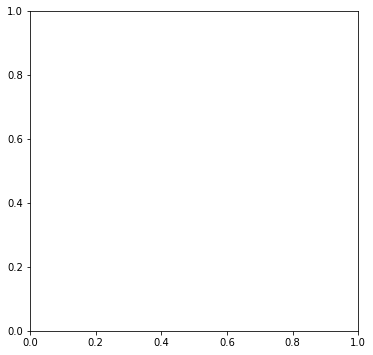

In [ ]:
x = numpy.linspace(-3,3,100)
y = numpy.linspace(-3,3,100)

R_euler = lambda z: 1 + z
R_RK4 = lambda z: 1 + z + z**2/2 + z**3/6. + z**4/24.
pi_BDF1 = lambda z: numpy.array([ 1. - z, -1.])

fig = plt.figure(figsize=(20,20))
axes = fig.add_subplot(3,3,1)
plot_stability_ssms(R_euler, x, y, axes=axes, title='Stability of Eulers method', continuous=True)
axes.plot([0,0], [-numpy.sqrt(6)/4, numpy.sqrt(6)/4], 'rx', markersize = 10)

axes = fig.add_subplot(3,3,2)
plot_stability_ssms(R_RK4, x, y, axes=axes, title='Stability of RK4 method', continuous=True)
axes.plot([0,0], [-numpy.sqrt(6)/4, numpy.sqrt(6)/4], 'rx', markersize = 10)

axes = fig.add_subplot(3,3,3)
plot_stability_lmm(pi_BDF1, x, y, axes=axes, title='Stability of Backwards Euler / BDF1 method')
axes.plot([0,0], [-numpy.sqrt(6)/4, numpy.sqrt(6)/4], 'rx', markersize = 10)

We see that the eigenvalues are outside the region of stability for both Euler's method and RK4.

### Solve Replicator Equations with Different Methods

In [ ]:
A,B = battleOfTheSexesPayoff(5,6,1)
pi= 0.7
qi= 0.55

func = lambda t, freq: assymetricTwoPlayer(t,freq,A,B)
euler_sol = euler(func, numpy.array([0,500]), numpy.array([pi, qi]), 1000)
improved_euler_sol = improved_euler(func, numpy.array([0,1000]), numpy.array([pi, qi]), 1000)
RK4_sol = RK4(func, numpy.array([0,1000]), numpy.array([pi, qi]), 1000)
NE = findNEassymetrictwoplayer(assymetricTwoPlayer, A, B)

fig = plt.figure(figsize=(20,10))

axes = fig.add_subplot(2, 2, 1)
axes.set_ylim(0,1)
axes.plot(euler_sol[0], euler_sol[1][0], 'm', label="Females")
axes.plot(euler_sol[0], euler_sol[1][1], 'b', label="Males")
axes.legend(loc="best")
axes.set_title("Frequencies of Players Playing Strategy 1 as a Function of Time; Euler Method")
axes.set_xlabel("t")
axes.set_ylabel("Frequencies of Players Playing Strategy 1")

axes = fig.add_subplot(2, 2, 2)
axes.set_ylim(0,1)
axes.plot(improved_euler_sol[0], improved_euler_sol[1][0], 'm', label="Females")
axes.plot(improved_euler_sol[0], improved_euler_sol[1][1], 'b', label="Males")
axes.legend(loc="best")
axes.set_title("Frequencies of Players Playing Strategy 1 as a Function of Time; Improved Euler Method")
axes.set_xlabel("t")
axes.set_ylabel("Frequencies of Players Playing Strategy 1")

axes = fig.add_subplot(2, 2, 3)
axes.set_ylim(0,1)
axes.plot(RK4_sol[0], RK4_sol[1][0], 'm', label="Females")
axes.plot(RK4_sol[0], RK4_sol[1][1], 'b', label="Males")
axes.legend(loc="best")
axes.set_title("Frequencies of Players Playing Strategy 1 as a Function of Time; RK4 Method")
axes.set_xlabel("t")
axes.set_ylabel("Frequencies of Players Playing Strategy 1")

In [ ]:
fig = plt.figure(figsize=(20,10))

axes = fig.add_subplot(2, 2, 1)
axes.set_xlim(0,1)
axes.set_ylim(0,1)
axes.plot(euler_sol[1][0], euler_sol[1][1], 'g')
axes.plot(NE[0],NE[1],'mx')
axes.plot(pi,qi,'ro')

for i in range(1, len(euler_sol[0]),15):
   axes.quiver(euler_sol[1][0][i],euler_sol[1][1][i], euler_sol[1][0][i+1]-euler_sol[1][0][i], euler_sol[1][1][i+1]-euler_sol[1][1][i],
               width = 0.005)

axes.set_title("Limit Cycle, Euler's Method")
axes.set_xlabel("p_1")
axes.set_ylabel("q_1")

axes = fig.add_subplot(2, 2, 2)
axes.set_xlim(0,1)
axes.set_ylim(0,1)
axes.plot(improved_euler_sol[1][0], improved_euler_sol[1][1], 'g')
axes.plot(NE[0],NE[1],'mx')
axes.plot(pi,qi,'ro')
for i in range(1, len(improved_euler_sol[0]),15):
   axes.quiver(improved_euler_sol[1][0][i],improved_euler_sol[1][1][i], improved_euler_sol[1][0][i+1]-improved_euler_sol[1][0][i], 
               improved_euler_sol[1][1][i+1]-improved_euler_sol[1][1][i], width = 0.005)
axes.set_title("Limit Cycle, Improved Euler's Method")
axes.set_xlabel("p_1")
axes.set_ylabel("q_1")

axes = fig.add_subplot(2, 2, 3)
axes.set_xlim(0,1)
axes.set_ylim(0,1)
axes.plot(RK4_sol[1][0], RK4_sol[1][1], 'g')
axes.plot(NE[0],NE[1],'mx')
axes.plot(pi,qi,'ro')
for i in range(1, len(RK4_sol[0]),100):
   axes.quiver(RK4_sol[1][0][i],RK4_sol[1][1][i], RK4_sol[1][0][i+1]-RK4_sol[1][0][i], RK4_sol[1][1][i+1]-RK4_sol[1][1][i], width = 0.005)
axes.set_title("Limit Cycle, RK4 Method")
axes.set_xlabel("p_1")
axes.set_ylabel("q_1")

## Discussion [10 pts]

Evaluate the results of your project including 
* Why should I believe that your numerical results are correct (convergence, test cases etc)?
* Did the project work (in your opinion)?
* If yes:  what would be the next steps to try
* If no:  Explain why your approach did not work and what you would do differently next time


In the prisoner’s dilemma/ symmetric case problem we know that we got the right solution because with standard payoff matricies, no matter the initial value used, the problem converged to the Nash equilibrium/ Evolutionary Stable state. This can both be seen in the cooperators time derivative graph which is always negative, or in the graph of population change over time in which the population converges to 0. The value of the Nash Equilibrium obtained numerically was the same as the expected Nash equilibrium value according to the paper we used (This again can be seen in the time derivative graph which has zeros at x=0 and x=1). Qualitatively, we were able to get graphs very similar to that within the paper (the graph for population change over time t) when using the same payoff matrix. Since graphing for the change in population required solving the ODE replicator, we thought that we would implement some of the different methods from class (improved euler, RK2, RK4) to compare the results. Since the exact analytical solution was impossible to obtain, we compared these results both qualitatively through graphing, and quantitaively against an high order method from solve_ivp. In order to compare our methods we first created a plot of absolute error. We decided to use absolute error since relative error was inconsistant due to very small values of solve_ivp. The results of this absolute error plot showed results similar to those found in class where the improved euler method showed the farthest results from solve_ivp, followed by RK2, and then RK4. Next we decided to create a convergence plot, which gave us some difficulties. While for low values of N the errors of our in class methods matched what we had expected (Improved Euler < RK2 < RK4 < solve_ivp), larger values of N lowered the Error to values even below machine epsilon. Additionally, we noted that for each method p=0, with no change over $\Delta t$. While we are not exactly sure where these issues stemed from, we belive this may have something to do with the extreme difficulties of analytically deriving exact solutions for the equation. In summary, we were sucessful in reproducing both analytical and computational results which exactly matched the paper, along with some metrics of error which showed our solutions to be very close to true. However, with some more time we would have liked to further investigate the convergence of our solution. For future work with symmetric equations, we would also like to explore a 3 player game like rock paper scissors.


In the Battle of the Sexes problem we saw unexpected behavior in the solutions found with the improved Euler and RK4 methods. The solution found with Euler’s method shows the expected behavior for the limit cycle, as shown in An Introduction To Evolutionary Game Theory Figure 2. The solution found with the improved Euler method does diverge from the Nash equilibrium as expected, but it does so very slowly. RK4 causes the equation to converge to the Nash equilibrium, which is opposite of expected behavior. 
 We know that our solutions for the Nash equilibrium are correct because they are the same as the Nash equilibriums that we solved for analytically.
The reason these solutions differ is their regions of stability. The eigenvalues for our example problem of R=5, C=6, D=1 lie outside the region of stability for both Euler’s method and the RK4 method. This explains the disparate behavior we are seeing between the two solutions. What is not totally clear is why the limit cycle of the solution found with Euler’s method appears to be correct based on the paper we are referencing. Overall, this certainly requires more exploration. A next step would be to implement Newton’s method to solve this problem, as the eigenvalues are in the region of stability for a BDF1 scheme. As shown in class, stability does not imply accuracy, so this method would not necessarily solve the problem correctly, but would be worth a try.
